# Simple RNN - Stock Market

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/AABA_2006-01-01_to_2018-01-01.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [3]:
data = data[['Open']]
data.head()

,Open
0,39.69
1,41.22
2,40.93
3,42.88
4,43.10


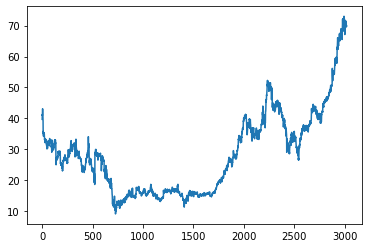

In [4]:
plt.plot(data)

In [5]:
X = data['Open'].values

In [6]:
X[:10]

array([39.69, 41.22, 40.93, 42.88, 43.1 , 42.96, 42.19, 41.92, 41.  ,
       39.09])

In [7]:
#[
#    [0.        , 0.00999983, 0.01999867] -> [0.0299955]
#    [0.00999983, 0.01999867, 0.0299955]  -> [0.03998933]
#    [0.01999867, 0.0299955 , 0.03998933] -> [0.04997917]
#    ...
#]

In [8]:
X_train, X_test = X[:2500],X[2500:]

In [9]:
model = Sequential()
model.add(SimpleRNN(units=64,activation='tanh'))
model.add(Dense(1))

In [10]:
model.compile(loss='mean_absolute_error',optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
seqence = 30

In [12]:
#XT: X train , yT: y train 
XT,yT = [],[] 
for i in range(len(X_train) - seqence ):
    d = i + seqence
    XT.append(X_train[i:d,])
    yT.append(X_train[d])

In [13]:
#XT: X test , yT: y test 
Xt,yt = [],[]
for i in range(len(X_test) - seqence):
    d = i + seqence
    Xt.append(X_test[i:d,])
    yt.append(X_test[d])

In [14]:
XT = np.array(XT)
yT = np.array(yT)

In [15]:
Xt = np.array(Xt)
yt = np.array(yt)

In [16]:
XT.shape

(2470, 30)

In [17]:
XT = np.reshape(XT,(XT.shape[0],XT.shape[1],1))
Xt = np.reshape(Xt,(Xt.shape[0],Xt.shape[1],1))

In [18]:
history = model.fit(XT,yT,epochs=100,batch_size=20,verbose=0)

Instructions for updating:
Use tf.cast instead.


In [19]:
model.evaluate(Xt, yt)

489/489 [==============================] - 0s 376us/sample - loss: 3.8861


3.8860694128555267

In [20]:
XTPredicted=model.predict(XT)
XtPredicted=model.predict(Xt)
XFinal=np.concatenate([XTPredicted,XtPredicted], axis=0)

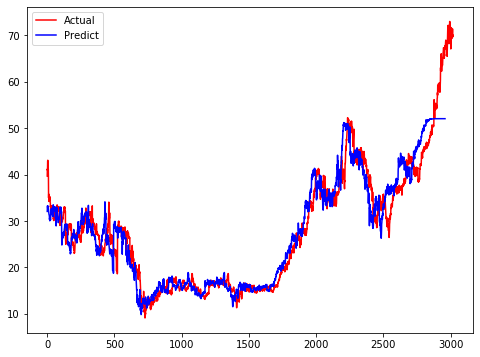

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(X,color='red',label='Actual')
plt.plot(XFinal,color='blue', label='Predict')
plt.legend()